In [2]:
import numpy as np
# from zhenglin.dl.metrics import FID
from torchmetrics.image.fid import FrechetInceptionDistance

fake = np.load(r'fake.npy')
real = np.load(r'real.npy')

In [3]:
fake.shape

(3000, 30)

In [4]:
fake.shape == real.shape

True

In [5]:
fake

array([[ 0.9990036 , -0.9999603 ,  0.999999  , ..., -0.9956125 ,
         0.9999884 ,  0.9999973 ],
       [ 0.9991068 , -0.9988468 ,  0.99961203, ..., -0.99953765,
         0.9999999 ,  0.9999021 ],
       [ 0.9978018 , -0.99890125,  0.9997767 , ..., -0.99958867,
         0.99999994,  0.99998814],
       ...,
       [ 0.9555084 , -0.9786407 ,  0.9996238 , ..., -0.99914163,
         0.99999994,  0.9999964 ],
       [ 0.99371815, -0.9980124 ,  0.9999361 , ..., -0.9904234 ,
         0.99998915,  0.9999932 ],
       [ 0.99841845, -0.99954194,  0.9999519 , ..., -0.99958086,
         0.9999999 ,  0.9999823 ]], dtype=float32)

In [6]:
fake.shape

(3000, 30)

In [7]:
if np.isnan(real).any():
    # find nan from real
    for i in range(real.shape[0]):
        for j in range(real.shape[1]):
            if np.isnan(real[i][j]):
                print(i, j)
                break

In [8]:
# real_safe = np.delete(real, [3610, 3637], axis=0)
# np.isnan(real_safe).any()

In [9]:
# fake_safe = np.delete(fake, [3610, 3617], axis=0)

In [10]:
fake_rand = np.random.rand(fake.shape[0], fake.shape[1])
real_rand = np.random.rand(fake.shape[0], fake.shape[1])

In [11]:
real_safe = real
fake_safe = fake

In [12]:
# shapiro-wilk test
# null hypothesis: the sample is drawn from a normal distribution
# once sample amount is more than 5000, shapiro-wilk test will be not reliable

import scipy

for i in range(30):
    x = real_safe[:, i]
    if scipy.stats.shapiro(x).pvalue < 0.05:
        print(i)

for i in range(30):
    x = fake_safe[:, i]
    if scipy.stats.shapiro(x).pvalue < 0.05:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [13]:
# Kolmogorov-Smirnov test
# null hypothesis: the two distributions are identical(default, two-sided)
# tests are valid only for continuous distributions

from scipy.stats import kstest
normal_dist = np.random.randn(1000)
kstest(real_safe[:, 0],"norm")

KstestResult(statistic=0.240898859396955, pvalue=1.0232892413305356e-153)

In [14]:
# D’Agostino and Pearson’s
# null hypothesis:  a sample comes from a normal distribution

from scipy.stats import normaltest

normaltest(real_safe[:, 0])

NormaltestResult(statistic=11051.737439291563, pvalue=0.0)

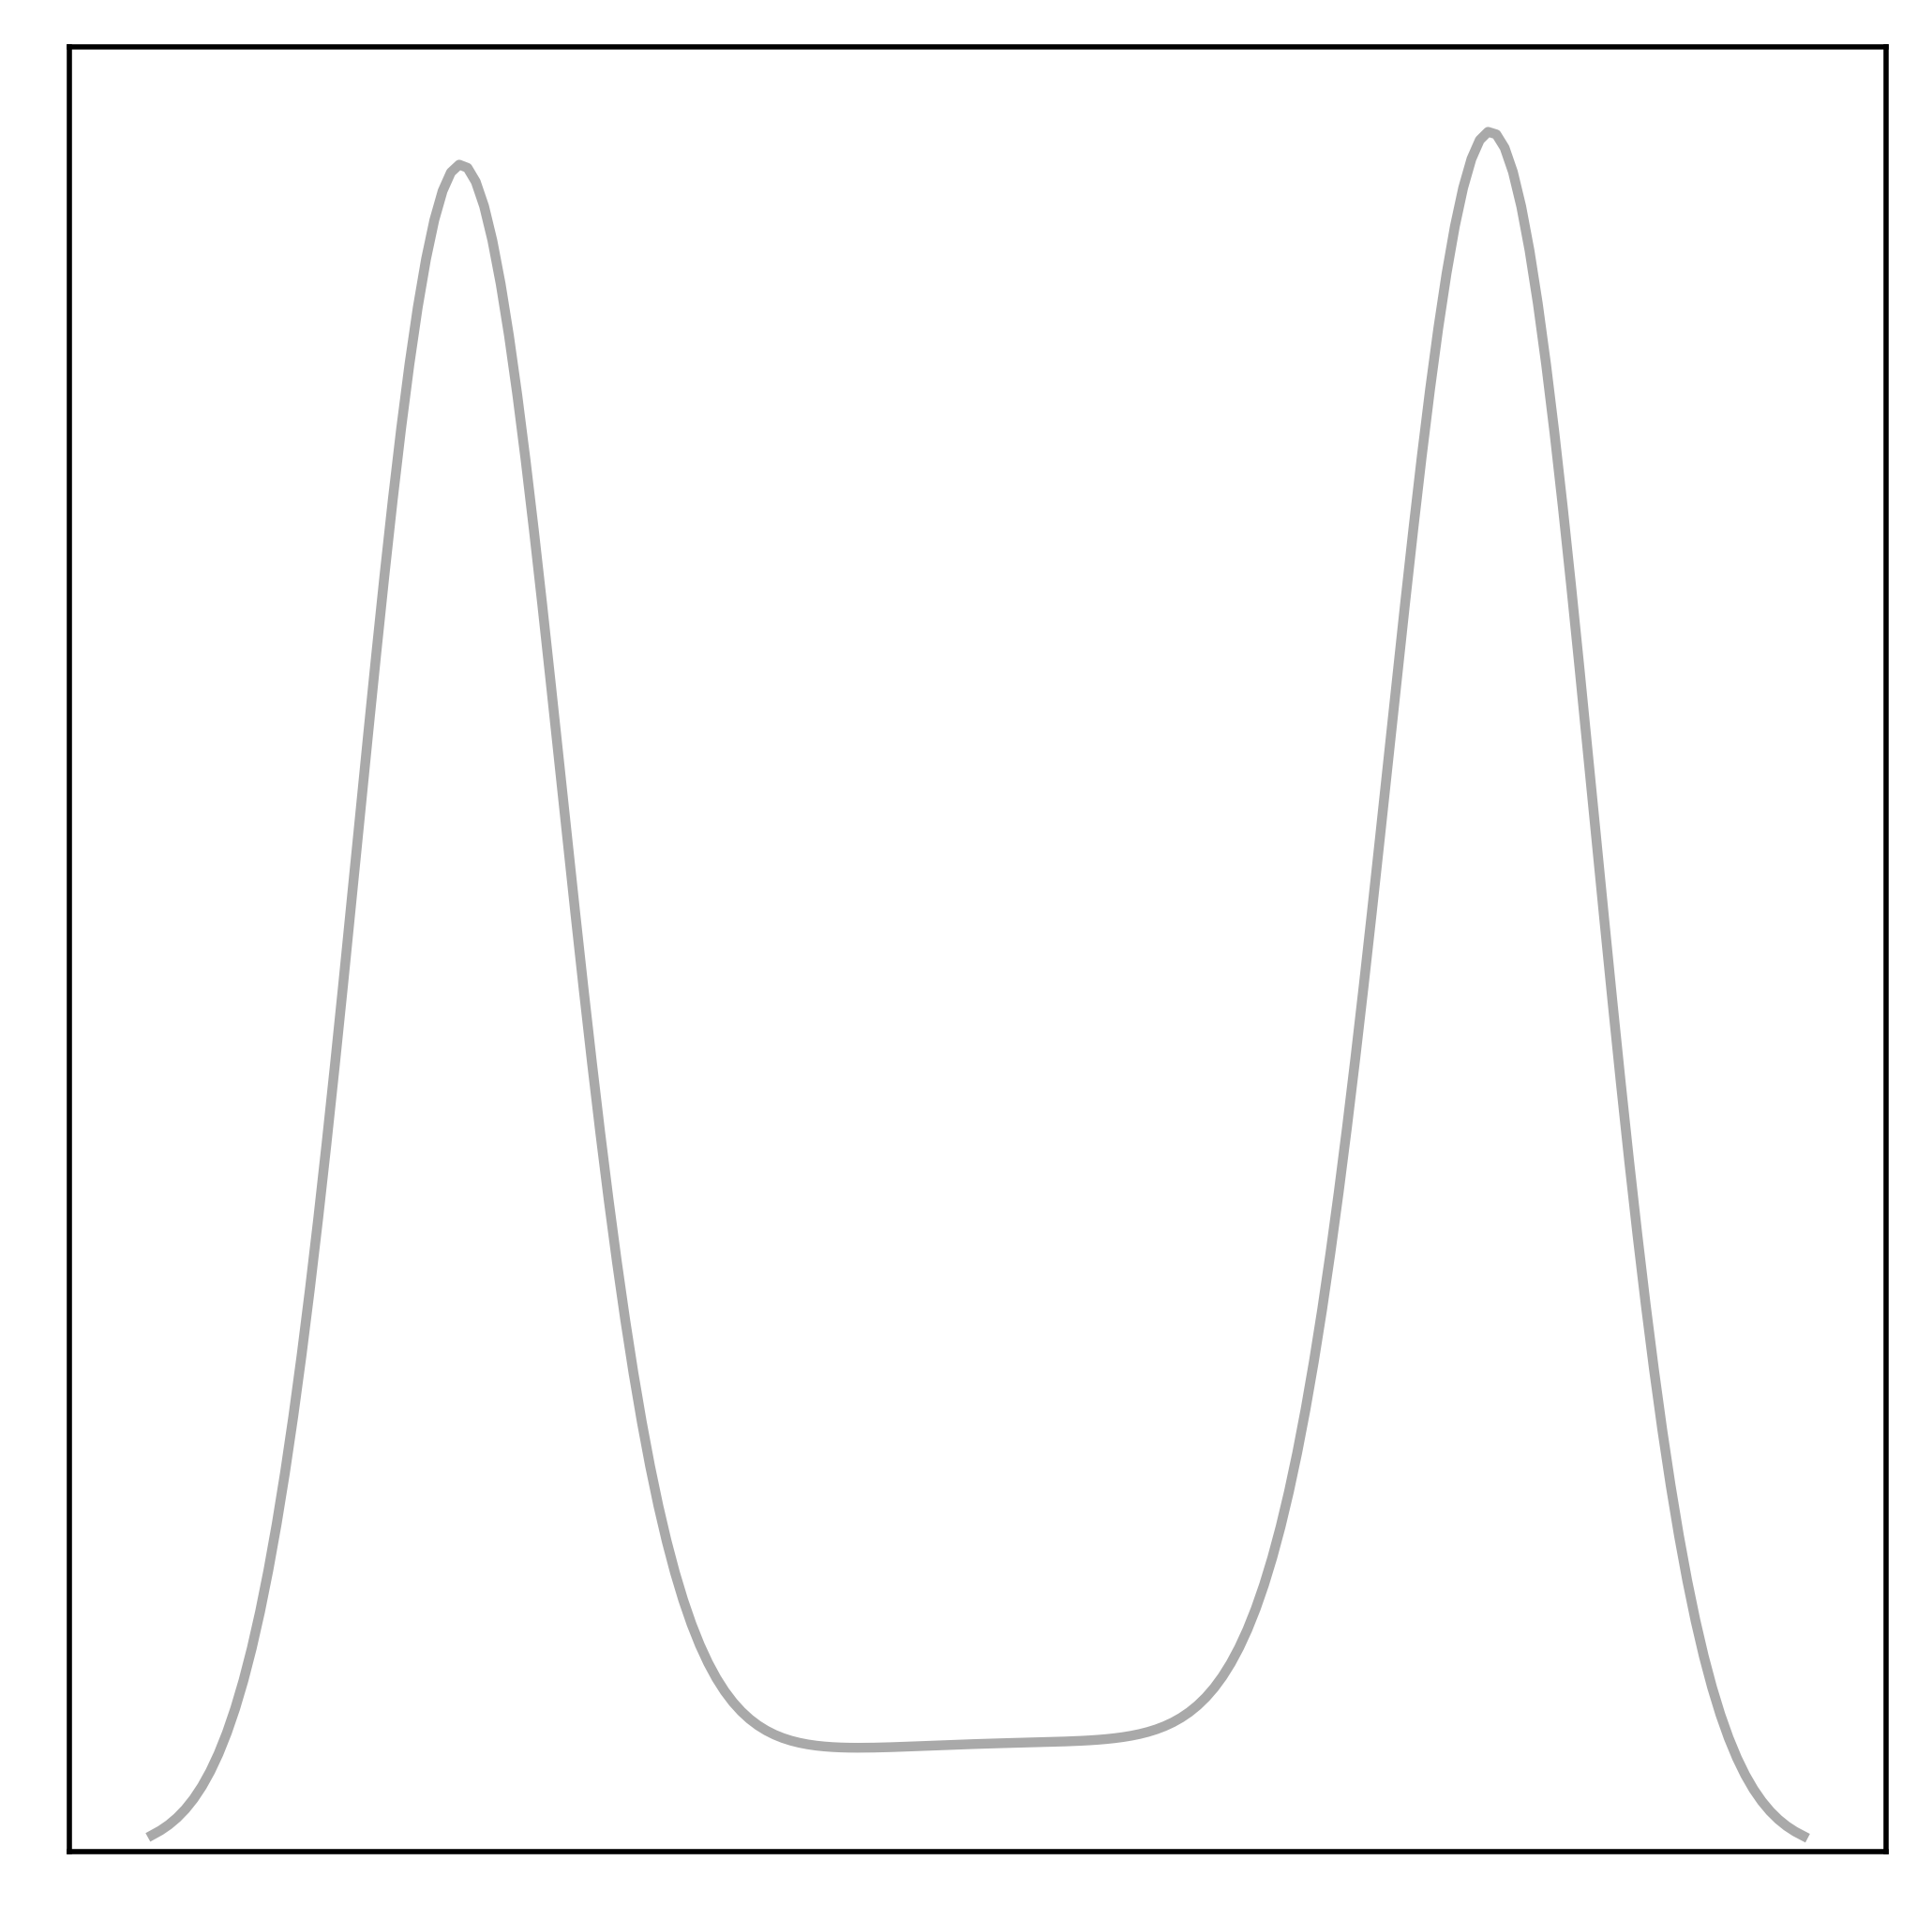

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(5, 5), dpi=500)
ax = fig.add_subplot(111)
for i in range(1):
    x = real_safe[:, i]
    sns.kdeplot(x, shade=False, color='darkgray', alpha=1, ax=ax)

# Hide xticks, yticks, xlabel, and ylabel
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()


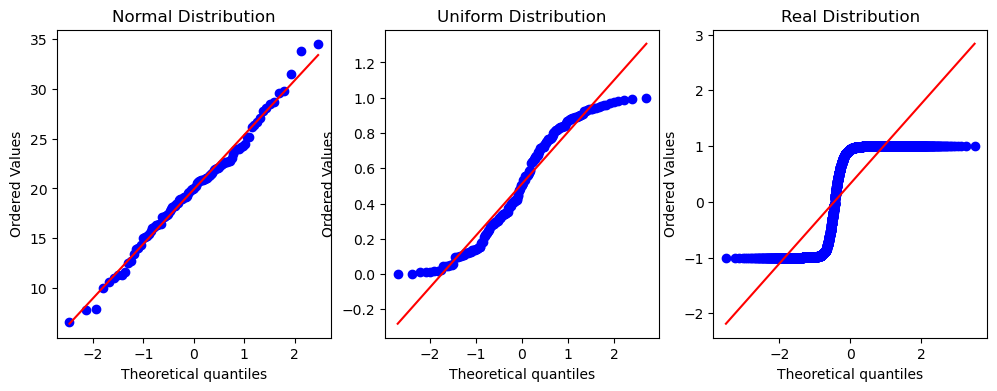

In [13]:
# probplot, PP plot 

import numpy as np 
import pylab 
import scipy.stats as stats

data_normal = np.random.normal(loc = 20, scale = 5, size=100)      # ideal normal distribution
data_real = real_safe[:, i]      # real distribution
data_uni = np.random.rand(200)      # uniform distribution

plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 3, 1)
stats.probplot(data_normal, dist="norm", plot=pylab)
ax1.set_title("Normal Distribution")

ax2 = plt.subplot(1, 3, 2)
stats.probplot(data_uni, dist="norm", plot=pylab)
ax2.set_title("Uniform Distribution")

ax3 = plt.subplot(1, 3, 3)
stats.probplot(data_real, dist="norm", plot=pylab)
ax3.set_title("Real Distribution")

pylab.show()

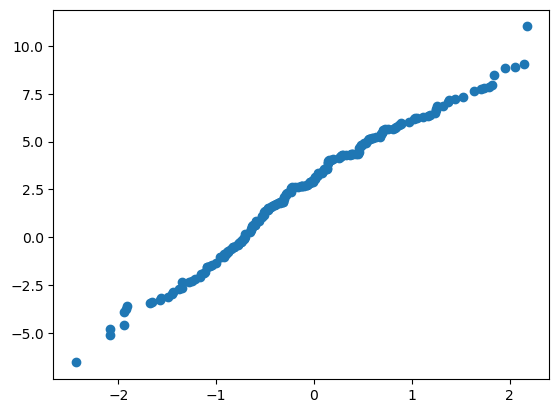

In [14]:
# testing
data_normal1 = np.random.normal(0, 1, 200)
data_normal1.sort()
data_normal2 = np.random.normal(2, 3, 200)
data_normal2.sort()
plt.scatter(data_normal1, data_normal2)

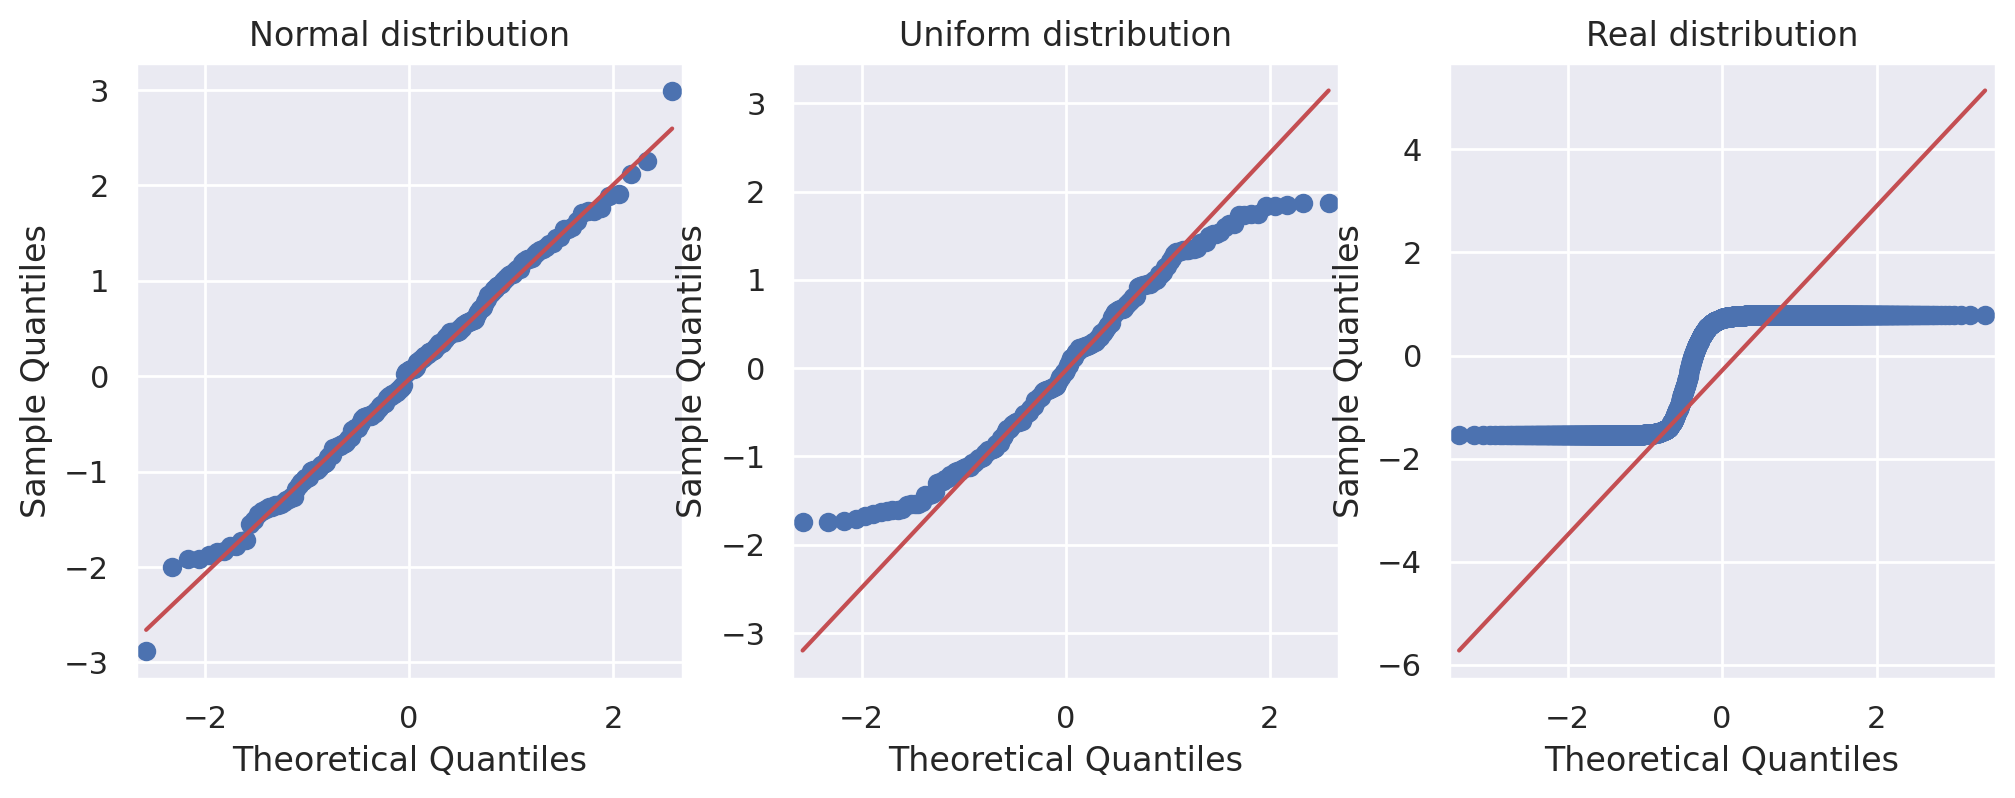

In [15]:
# qqplot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
 
sns.set_theme()# 设置风格
%config InlineBackend.figure_format = 'retina' # 让图片更清晰
 
mu, sigma = 0, 1      # 均值和标准差
data_normal = np.random.normal(mu, sigma, 200)
data_uni = np.random.rand(200)
data_real = real_safe[:, i]

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
fig = qqplot(data_normal, line="q", ax=ax1, fit=True)
ax1.set_title("Normal distribution")

ax2 = fig.add_subplot(132)
fig = qqplot(data_uni, line="q", ax=ax2, fit=True)
ax2.set_title("Uniform distribution")

ax3 = fig.add_subplot(133)
fig = qqplot(data_real, line="q", ax=ax3, fit=True)
ax3.set_title("Real distribution")

plt.show()

In [16]:
real = fake_safe
fake = real_safe

n = fake.shape[0]

mean_fake = np.mean(real, axis=0)[None, ...]
mean_real = np.mean(fake, axis=0)[None, ...]

cov_fake_sum = fake.T @ fake - n * mean_fake.T @ mean_fake
cov_real_sum = real.T @ real - n * mean_real.T @ mean_real

cov_fake = cov_fake_sum / (n - 1)
cov_real = cov_real_sum / (n - 1)

In [17]:
mu1, mu2, sig1, sig2 = mean_fake, mean_real, cov_fake, cov_real

print(np.isnan(mu1).any(), np.isnan(mu2).any(), np.isnan(sig1).any(), np.isnan(sig2).any())

sig1sig2 = sig1 @ sig2
sig1sig2

False False False False


array([[-1.76559162e+01,  1.81236305e+01, -1.82685127e+01,
         1.72829590e+01, -1.73046646e+01,  1.58144131e+01,
        -1.63153267e+01,  1.73686600e+01, -1.47839928e+01,
        -1.76494579e+01, -1.72216206e+01, -1.80846233e+01,
         1.41680984e+01,  1.51811304e+01, -1.78246098e+01,
         1.63886280e+01,  1.42840767e+01, -1.87900791e+01,
         1.80049419e+01,  1.77205982e+01, -1.52474384e+01,
        -3.32433867e+00,  1.52878561e+01, -1.77686749e+01,
         1.78115788e+01,  1.68797112e+01,  6.47389555e+00,
         1.82247887e+01, -1.79339466e+01, -1.87502613e+01],
       [ 1.70851059e+01, -1.74896679e+01,  1.76889343e+01,
        -1.65992928e+01,  1.68545494e+01, -1.52021599e+01,
         1.57155113e+01, -1.69530773e+01,  1.42130575e+01,
         1.71978645e+01,  1.68024330e+01,  1.75225010e+01,
        -1.37921276e+01, -1.46378336e+01,  1.71923599e+01,
        -1.59231586e+01, -1.39651880e+01,  1.80468807e+01,
        -1.74368629e+01, -1.71032028e+01,  1.46076536e+

In [18]:
a = np.sum((mu1 - mu2) ** 2)
b = np.trace(sig1 + sig2 - 2 * np.sqrt(sig1sig2))

/tmp/ipykernel_21597/1235932114.py:2: RuntimeWarning: invalid value encountered in sqrt
  b = np.trace(sig1 + sig2 - 2 * np.sqrt(sig1sig2))


In [19]:
import torch

mu1_tensor = torch.tensor(mu1)
mu2_tensor = torch.tensor(mu2)
sig1_tensor = torch.tensor(sig1)
sig2_tensor = torch.tensor(sig2) 

a = (mu1_tensor - mu2_tensor).square().sum(dim=-1)
b = sig1_tensor.trace() + sig2_tensor.trace()
c = torch.linalg.eigvals(sig1_tensor @ sig2_tensor).sqrt().real.sum(dim=-1)

a + b - 2 * c

tensor([35.8898])

In [20]:
from scipy import linalg

print("Checking if mu1 is 1d")
mu1 = np.atleast_1d(mu1)
mu2 = np.atleast_1d(mu2)

print("Checking if sig1 is 2d")
sig1 = np.atleast_2d(sig1)
sig2 = np.atleast_2d(sig2)

assert mu1.shape == mu2.shape, \
    'Training and test mean vectors have different lengths'
assert sig1.shape == sig2.shape, \
    'Training and test covariances have different dimensions'

print("Calculating diff")
diff = mu1 - mu2

Checking if mu1 is 1d
Checking if sig1 is 2d
Calculating diff


In [15]:
# Product might be almost singular
print("Calculating covmean")    # BUG: Extremely slow
try:
    covmean, _ = linalg.sqrtm(s1s2, disp=False)
except ValueError:
    print('Warning: covariance is singular!!!')

In [ ]:
print("Checking if covmean is finite")    
if not np.isfinite(covmean).all():
    msg = ('fid calculation produces singular product; '
            'adding %s to diagonal of cov estimates') % eps
    print(msg)
    offset = np.eye(sig1.shape[0]) * eps
    covmean = linalg.sqrtm((sig1 + offset).dot(sig2 + offset))

print("Checking if covmean is complex")
# Numerical error might give slight imaginary component
if np.iscomplexobj(covmean):
    if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
        m = np.max(np.abs(covmean.imag))
        raise ValueError('Imaginary component {}'.format(m))
    covmean = covmean.real

print("Calculating trace")
tr_covmean = np.trace(covmean)

(diff.dot(diff) + np.trace(sig1) + np.trace(sig2) - 2 * tr_covmean)

In [1]:
import torch
_ = torch.manual_seed(123)
from torchmetrics.image.fid import FrechetInceptionDistance
fid = FrechetInceptionDistance(feature=64)
# generate two slightly overlapping image intensity distributions
imgs_dist1 = torch.randint(0, 200, (100, 3, 299, 299), dtype=torch.uint8)
imgs_dist2 = torch.randint(100, 255, (100, 3, 299, 299), dtype=torch.uint8)
fid.update(imgs_dist1, real=True)
fid.update(imgs_dist2, real=False)
fid.compute()

/home/zhenglin/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


tensor([[ 3.2300e-04, -5.9652e-05,  2.3352e-05,  ...,  9.1943e-06,
          1.8459e-06, -8.7285e-07],
        [-5.9652e-05,  3.9351e-04, -8.1430e-06,  ..., -3.0281e-05,
         -2.9018e-06, -1.3708e-05],
        [ 2.3352e-05, -8.1430e-06,  6.8409e-05,  ..., -1.3522e-05,
          2.9151e-07, -1.1030e-05],
        ...,
        [ 9.1943e-06, -3.0281e-05, -1.3522e-05,  ...,  3.0225e-04,
         -3.1891e-05, -1.8972e-05],
        [ 1.8459e-06, -2.9018e-06,  2.9151e-07,  ..., -3.1891e-05,
          4.3454e-05, -7.1631e-06],
        [-8.7285e-07, -1.3708e-05, -1.1030e-05,  ..., -1.8972e-05,
         -7.1631e-06,  5.3555e-05]], dtype=torch.float64)


tensor(12.7202)